## Predicción sobre la llegada del paquete a su destino
- La empresa de logística busca implementar un modelo que le permita predecir si un envió llegará a tiempo o no
- Según la información del datasets puesta a disposición, analizar los datos para poder optimizar los procesos logísticos

## Análisis exploratorio de datos
Lo que se hará primero será explorar el conjunto de datos, observar las características de las dimensiones, realizar análisis descriptivo y visualizar la relación entre las variables. Se comenzará con explorar el primer excel que contiene todas las variables. 

In [1]:
# instalamos la libreria necesario para importar el archivo excel
# pip install openyxl

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
#importamos los datos del excel
data_train = pd.read_excel(r"./E-Commerce_train.xlsx")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [28]:
#eliminamos la variable ID que es innecesaria
data_train.drop(['ID'],axis=1, inplace=True)

In [29]:
data_train.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


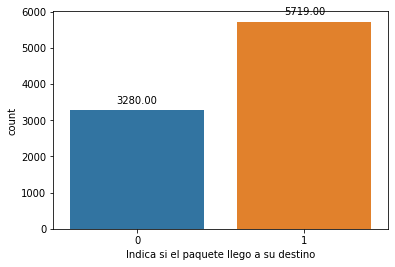

In [30]:
#Cantidad de paquetes que llegaron a su destino y los que no
ax = sns.countplot(x='Reached.on.Time_Y.N', data = data_train)
ax.set(xlabel = 'Indica si el paquete llego a su destino')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax;

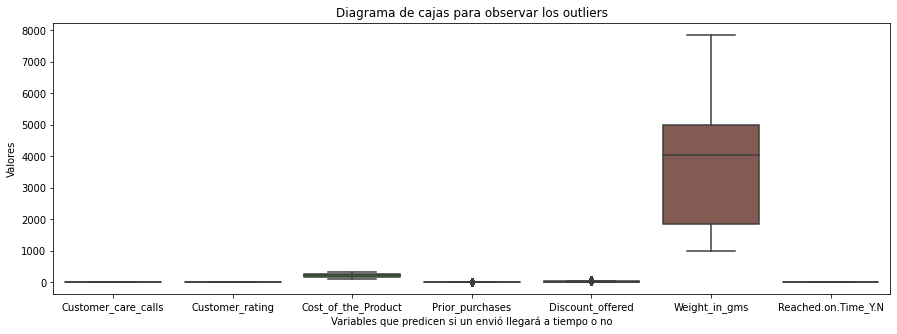

In [31]:
#Diagrama de cajas de las variables numéricas para observar los outliers
plt.figure(figsize=(15,5))
sns.boxplot(data= data_train)
plt.title('Diagrama de cajas para observar los outliers')
plt.xlabel('Variables que predicen si un envió llegará a tiempo o no')
plt.ylabel('Valores');

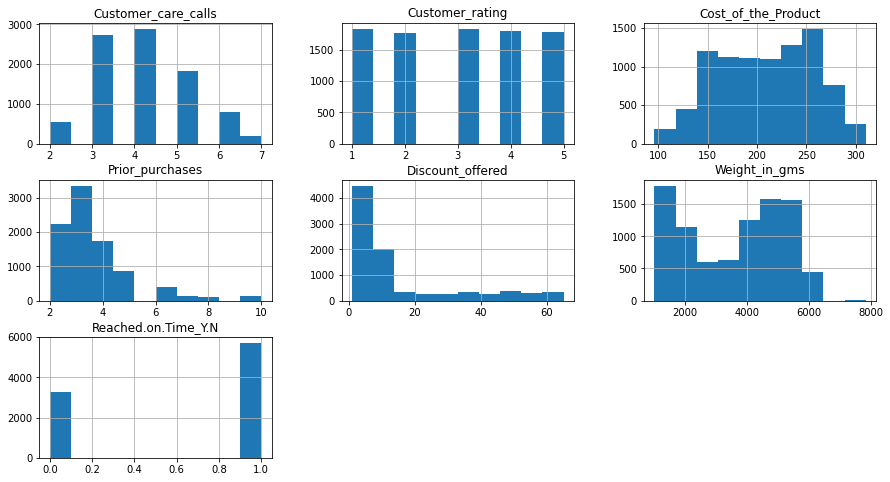

In [32]:
#Histograma de las variables numéricas
data_train.hist(figsize=(15,8));

In [34]:
data_train[(data_train['Gender']=='F')&(data_train['Reached.on.Time_Y.N']==0)].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.0
mean,4.102950,2.940397,213.632149,3.588200,5.594220,4308.406382,0.0
std,1.158363,1.418276,47.685682,1.519022,2.855401,1481.730633,0.0
min,2.000000,1.000000,97.000000,2.000000,1.000000,1003.000000,0.0
25%,3.000000,2.000000,176.000000,3.000000,3.000000,4149.000000,0.0
50%,4.000000,3.000000,217.000000,3.000000,6.000000,4767.000000,0.0
75%,5.000000,4.000000,253.000000,4.000000,8.000000,5359.000000,0.0
max,7.000000,5.000000,310.000000,10.000000,10.000000,5998.000000,0.0


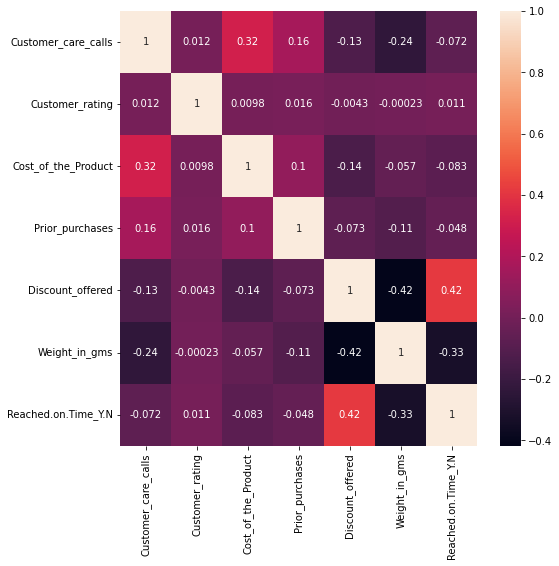

In [35]:
#Con heatmap identificamos las relaciones entre las variables
plt.figure(figsize=(8,8))
sns.heatmap(data_train.corr(),annot=True);

Podemos observar lo siguiente:

- Podemos observar que existen ciertas variables que tienen una correlación significativa con respecto a la correlación entre las demás variables.
- Además existen variables que no aportan mucho a la variable dependiente

Entonces, viendo las gráficas y las estadisticas, procedemos a eliminar las siguientes variables:
- Customer rating
- Gender

In [36]:
data_train.drop(columns=['Customer_rating', 'Gender'], inplace = True)

### Preprocesamiento de los datos
EL procesamiento implica separar o identificar datos categoricos o numéricoss, codificar variables categóricas, escalar los datos. 

In [37]:
#Separamos las etiquetas de las variables categoricas y las numéricas
cat=[]
num=[]
for i in data_train.columns:
  if data_train[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)
    
print(f'Categóricas = {cat}')
print(f'Numéricas = {num}')

Categóricas = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
Numéricas = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [38]:
# Eliminamos 'Reached.on.Time_Y.N' ya que lo consideran con una variable numérica
num.pop()

'Reached.on.Time_Y.N'

#### Dummies y Scaling en los datos
- Primero vamos a codificar las variables categóricas, es decir, con la función 'get_dummies' cambiaremos las variables categoricas que se encuentran en formato string a dummies para poder trabajar con números (0 y 1).
- Después se hará el escalado de las variables numéricas, estádaiza los datos eliminando la medi y escalando los datos de forma que su varianza sea igual a 1.

In [39]:
#Realizamos una copia del df
df_encoded = data_train.copy()

df_encoded_1 = pd.get_dummies(df_encoded[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']])
df_encoded = df_encoded.drop(df_encoded[cat], axis=1)
df_encoded = pd.concat([df_encoded, df_encoded_1], axis=1)
df_encoded

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,3,217,3,1,4177,1,0,0,0,1,0,0,0,1,0,1,0
8995,5,232,3,3,4526,0,0,0,0,0,1,0,0,1,0,0,1
8996,4,260,3,6,4221,0,1,0,0,0,0,0,0,1,0,0,1
8997,4,184,3,5,5931,1,0,1,0,0,0,0,0,1,0,0,1


In [40]:
#importando StandarScale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_encoded = df_encoded[num]
scaled_encoded = scaler.fit_transform(scaled_encoded)

#Ahora creamos un
scaled = df_encoded.copy()
scaled[num] = scaled_encoded

scaled

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,-0.013270,-0.653630,-0.333881,1.661141,-1.456259,1,0,0,0,1,0,1,0,0,0,1,0
1,-0.013270,0.154049,-0.986627,2.523256,-0.307411,1,0,0,0,0,1,1,0,0,0,1,0
2,-1.769395,-0.529372,0.318866,1.891039,-0.130284,1,1,0,0,0,0,1,0,0,0,1,0
3,-0.891333,-0.674340,0.318866,-0.292986,-1.490942,1,0,1,0,0,0,1,0,0,0,0,1
4,-1.769395,-0.508662,-0.333881,1.776090,-0.681484,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,-0.891333,0.174759,-0.333881,-0.810254,0.367034,1,0,0,0,1,0,0,0,1,0,1,0
8995,0.864793,0.485405,-0.333881,-0.695306,0.583179,0,0,0,0,0,1,0,0,1,0,0,1
8996,-0.013270,1.065277,-0.333881,-0.522883,0.394284,0,1,0,0,0,0,0,0,1,0,0,1
8997,-0.013270,-0.508662,-0.333881,-0.580357,1.453331,1,0,1,0,0,0,0,0,1,0,0,1


## Desarrollando el modelo
- Primero se va a dividir los datos en muestras de entrenamiento y de prueba

In [41]:
from sklearn.model_selection import train_test_split

X = scaled.drop(['Reached.on.Time_Y.N'], axis = 1).values
y = scaled['Reached.on.Time_Y.N'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6749, 16) (2250, 16) (6749,) (2250,)


## Logistic regresion

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

In [45]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Exhaustividad / Recall 
exhaustividad = recall_score(y_test, y_test_pred)
print(f'Exhaustividad : {exhaustividad}')

#Exactitud
exactitud = accuracy_score(y_test, y_test_pred)
print(f'Exactitud : {exactitud}')

#F1
F1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {F1}')

#Curva ROC-AOC
curva_roc_auc = roc_auc_score(y_test, y_test_pred)
print(f'Curva ROC-AUC del modelo:  {curva_roc_auc}')

Exhaustividad : 0.7255972696245734
Exactitud : 0.6635555555555556
F1 Score: 0.7374262920568853
Curva ROC-AUC del modelo:  0.636683985130758


### Probando el modelo en el datasets de prueba

In [59]:
data_test = pd.read_excel(r'./E-Commerce_test.xlsx')
data_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247
1997,10997,C,Ship,5,4,242,5,low,F,4,1155
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210


In [60]:
data_test.drop(columns=['ID', 'Customer_rating', 'Gender'], inplace = True)

In [61]:
#Realizamos una copia del df
df_test = data_test.copy()

df_1 = pd.get_dummies(df_test[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']])
df_test = df_test.drop(df_test[cat], axis=1)
df_test = pd.concat([df_test, df_1], axis=1)

In [62]:
#Escalando los datos numéricos
scaled_test = df_test[num]
scaled_test = scaler.fit_transform(scaled_test)

#Ahora creamos una nueva máscara
scaled_2 = df_test.copy()
scaled_2[num] = scaled_test

In [63]:
X2 = scaled_2
y2_pred = model_lr.predict(X2)

c:\Users\Ken\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [64]:
Darkencc = pd.DataFrame(y2_pred, columns = ['pred'])
Darkencc

,pred
0,1
1,1
2,0
3,0
4,0
...,...
1995,0
1996,1
1997,1
1998,0


In [ ]:
Darkencc.to_csv('Darkencc.csv', index = False)